In [28]:
# Data Processing
import pandas as pd
import numpy as np

#test
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [29]:
#Data reading 
Phy_Che = pd.read_pickle('/Users/lidiayung/PhD_project/project_PONDERFUL/ponderful_OUTPUT/Phy_Che_qt.pkl')
display(Phy_Che)


,Pond_ID,PondCode,X,Y,Pondscape,Country,Strat_Survey,Resampling,season_col,pH,...,Aquatic_500.t,Cropland_500.t,Forest_500.t,Pastures.and.open.nature_500.t,Urban_500.t,Aquatic_500_qt,Cropland_500_qt,Forest_500_qt,Pastures.and.open.nature_500_qt,Urban_500_qt
1,BE048,AW1_NA1,5.032370,51.327590,Antwerp,Belgium,1,0,Spring,6.355,...,-0.635657,-0.402250,0.910612,-0.067940,-0.654950,0.000000,-0.570731,0.899016,-0.067940,-2.393980
2,BE049,AW1_IN2,5.002750,51.329040,Antwerp,Belgium,1,0,Spring,6.305,...,0.849086,-0.459558,1.063622,-0.346234,0.579132,0.210428,-0.639147,1.052930,-0.346234,0.318639
3,BE050,AW1_EX1,5.032560,51.362150,Antwerp,Belgium,1,0,Spring,6.005,...,-0.635657,0.357345,0.357345,-0.036563,-0.183805,0.000000,0.271036,0.341070,-0.036563,-0.718868
4,BE051,AW1_NA2,4.922010,51.358100,Antwerp,Belgium,1,0,Spring,7.195,...,1.120502,-0.152026,0.413601,0.459558,0.078412,0.593821,-0.282875,0.397935,0.459558,-0.318639
5,BE052,AW1_IN1,5.016750,51.343080,Antwerp,Belgium,1,0,Spring,5.900,...,-0.635657,-0.026114,0.269558,0.591528,-0.554602,0.000000,-0.142907,0.252250,0.591528,-1.618497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,URG026,VCL2,-54.749753,-34.383481,Valle del Cordillera,Uruguay,1,1,Spring,7.880,...,-0.635657,-1.731664,-0.776422,1.665398,-1.150349,0.000000,0.000000,-0.822105,1.665398,0.000000
237,URG027,VCL3,-54.747753,-34.384983,Valle del Cordillera,Uruguay,1,1,Spring,7.800,...,-0.635657,-1.731664,-0.194437,1.343325,-1.150349,0.000000,0.000000,-0.219486,1.343325,0.000000
238,URG028,VCH1,-54.759703,-34.383453,Valle del Cordillera,Uruguay,1,1,Spring,9.610,...,-0.635657,-0.335166,-1.181259,1.369531,-0.390951,0.000000,-0.491989,-1.260117,1.369531,-1.123769
239,URG029,VCH2,-54.767964,-34.379486,Valle del Cordillera,Uruguay,1,1,Spring,8.470,...,-0.635657,-0.324138,-0.604016,1.140287,-1.150349,0.000000,-0.479169,-0.641518,1.140287,0.000000


In [30]:
Phy_Che.columns

Index(['Pond_ID', 'PondCode', 'X', 'Y', 'Pondscape', 'Country', 'Strat_Survey',
       'Resampling', 'season_col', 'pH', 'O2_con', 'O2_sat', 'Turb', 'Sludge',
       'Snel', 'Cond', 'T', 'TN', 'TP', 'DOC', 'TOC', 'CHLa', 'PC',
       'Sulphates', 'Chlorides', 'Alkalinity', 'Ca', 'Mg', 'Na', 'K', 'TSS',
       'N.NO3', 'P.PO4', 'N.NH4', 'N.NO2', 'CHLa_Spectro', 'N.NO23', 'Fe',
       'Secchi_Depth', 'CHLa_RFU', 'PC_RFU', 'TDN', 'OM', 'year',
       'Hydeoperiod_length', 'bio1', 'bio4', 'bio5', 'bio6', 'bio7', 'bio12',
       'bio15', 'bio17', 'Nat_res', 'Area', 'Depth', 'Pond_dries',
       'Rel_waterlev', 'PVI', 'Animals_cont', 'lifestockQ', 'Natural_5',
       'Aquatic_500', 'Cropland_500', 'Forest_500',
       'Pastures.and.open.nature_500', 'Urban_500', 'ECELS', 'bio1.t',
       'bio4.t', 'bio5.t', 'bio6.t', 'bio7.t', 'bio12.t', 'bio15.t', 'bio17.t',
       'Area.t', 'Depth.t', 'Animals_cont.t', 'Hydeoperiod_length.t',
       'ECELS.t', 'Natural_5.t', 'Aquatic_500.t', 'Cropland_500.

In [31]:
vars=['Pond_ID', 'PondCode', 'Pondscape', 'Country', 'Strat_Survey','TN', 'TP',
       'Resampling', 'season_col','Area.t', 'Depth.t','bio1.t', 'bio4.t', 'bio5.t','bio12.t','Hydeoperiod_length.t',
       'Animals_cont.t', 'Natural_5.t','Aquatic_500_qt', 'Cropland_500_qt', 'Forest_500_qt',
       'Pastures.and.open.nature_500_qt','Urban_500_qt']
Phy_Che_random_forest_df = Phy_Che[vars]
display(Phy_Che_random_forest_df)

,Pond_ID,PondCode,Pondscape,Country,Strat_Survey,TN,TP,Resampling,season_col,Area.t,...,bio5.t,bio12.t,Hydeoperiod_length.t,Animals_cont.t,Natural_5.t,Aquatic_500_qt,Cropland_500_qt,Forest_500_qt,Pastures.and.open.nature_500_qt,Urban_500_qt
1,BE048,AW1_NA1,Antwerp,Belgium,1,1.30,0.038,0,Spring,7.247081,...,-0.324138,0.318639,0.487558,0.390951,-1.354013,0.000000,-0.570731,0.899016,-0.067940,-2.393980
2,BE049,AW1_IN2,Antwerp,Belgium,1,3.20,0.494,0,Spring,6.510261,...,-0.368501,0.318639,0.487558,0.390951,-0.152667,0.210428,-0.639147,1.052930,-0.346234,0.318639
3,BE050,AW1_EX1,Antwerp,Belgium,1,1.85,0.058,0,Spring,7.475340,...,-0.379702,0.318639,0.487558,0.390951,0.057716,0.000000,0.271036,0.341070,-0.036563,-0.718868
4,BE051,AW1_NA2,Antwerp,Belgium,1,3.60,2.125,0,Spring,5.886112,...,-0.530402,0.362917,0.487558,0.390951,-1.753607,0.593821,-0.282875,0.397935,0.459558,-0.318639
5,BE052,AW1_IN1,Antwerp,Belgium,1,2.65,0.893,0,Spring,9.047821,...,-0.346234,0.318639,0.487558,0.390951,-0.308999,0.000000,-0.142907,0.252250,0.591528,-1.618497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,URG026,VCL2,Valle del Cordillera,Uruguay,1,0.58,0.050,1,Spring,6.430480,...,0.797777,0.841621,0.487558,0.942702,-1.753607,0.000000,0.000000,-0.822105,1.665398,0.000000
237,URG027,VCL3,Valle del Cordillera,Uruguay,1,0.56,0.040,1,Spring,5.133831,...,0.797777,0.841621,0.487558,0.942702,-1.354013,0.000000,0.000000,-0.219486,1.343325,0.000000
238,URG028,VCH1,Valle del Cordillera,Uruguay,1,2.00,0.320,1,Spring,8.553309,...,0.797777,0.841621,0.487558,1.454408,-1.753607,0.000000,-0.491989,-1.260117,1.369531,-1.123769
239,URG029,VCH2,Valle del Cordillera,Uruguay,1,1.05,0.120,1,Spring,6.587290,...,0.797777,0.841621,0.487558,1.454408,-1.753607,0.000000,-0.479169,-0.641518,1.140287,0.000000


### Spliting the data


In [32]:
Phy_Che_random_forest_df

,Pond_ID,PondCode,Pondscape,Country,Strat_Survey,TN,TP,Resampling,season_col,Area.t,...,bio5.t,bio12.t,Hydeoperiod_length.t,Animals_cont.t,Natural_5.t,Aquatic_500_qt,Cropland_500_qt,Forest_500_qt,Pastures.and.open.nature_500_qt,Urban_500_qt
1,BE048,AW1_NA1,Antwerp,Belgium,1,1.30,0.038,0,Spring,7.247081,...,-0.324138,0.318639,0.487558,0.390951,-1.354013,0.000000,-0.570731,0.899016,-0.067940,-2.393980
2,BE049,AW1_IN2,Antwerp,Belgium,1,3.20,0.494,0,Spring,6.510261,...,-0.368501,0.318639,0.487558,0.390951,-0.152667,0.210428,-0.639147,1.052930,-0.346234,0.318639
3,BE050,AW1_EX1,Antwerp,Belgium,1,1.85,0.058,0,Spring,7.475340,...,-0.379702,0.318639,0.487558,0.390951,0.057716,0.000000,0.271036,0.341070,-0.036563,-0.718868
4,BE051,AW1_NA2,Antwerp,Belgium,1,3.60,2.125,0,Spring,5.886112,...,-0.530402,0.362917,0.487558,0.390951,-1.753607,0.593821,-0.282875,0.397935,0.459558,-0.318639
5,BE052,AW1_IN1,Antwerp,Belgium,1,2.65,0.893,0,Spring,9.047821,...,-0.346234,0.318639,0.487558,0.390951,-0.308999,0.000000,-0.142907,0.252250,0.591528,-1.618497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,URG026,VCL2,Valle del Cordillera,Uruguay,1,0.58,0.050,1,Spring,6.430480,...,0.797777,0.841621,0.487558,0.942702,-1.753607,0.000000,0.000000,-0.822105,1.665398,0.000000
237,URG027,VCL3,Valle del Cordillera,Uruguay,1,0.56,0.040,1,Spring,5.133831,...,0.797777,0.841621,0.487558,0.942702,-1.354013,0.000000,0.000000,-0.219486,1.343325,0.000000
238,URG028,VCH1,Valle del Cordillera,Uruguay,1,2.00,0.320,1,Spring,8.553309,...,0.797777,0.841621,0.487558,1.454408,-1.753607,0.000000,-0.491989,-1.260117,1.369531,-1.123769
239,URG029,VCH2,Valle del Cordillera,Uruguay,1,1.05,0.120,1,Spring,6.587290,...,0.797777,0.841621,0.487558,1.454408,-1.753607,0.000000,-0.479169,-0.641518,1.140287,0.000000


In [33]:
#UK lancaster has NA values for both TP and TP
Phy_Che_random_forest_df.dropna(inplace=True)

/var/folders/qq/n8l4bgxs53j_s3twq5jzc7g00000gn/T/ipykernel_13109/1573237295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Phy_Che_random_forest_df.dropna(inplace=True)


In [34]:
num_bins = 3
# Use numpy's histogram function for equal width bins
hist, bins = np.histogram(Phy_Che_random_forest_df['TN'], bins=num_bins)

In [35]:
Phy_Che_random_forest_df['TN'].sort_values(ascending=False)
#All less than 10

122    7.970000
92     7.664000
74     6.700000
88     6.166667
132    5.702000
         ...   
172    0.410000
101    0.376000
214    0.370000
141    0.330000
163    0.320000
Name: TN, Length: 238, dtype: float64

In [36]:
Phy_Che_random_forest_df['TP'].sort_values(ascending=False)


25     3.70800
21     3.06900
64     2.31300
88     2.18975
4      2.12500
        ...   
141    0.01900
140    0.01800
49     0.01300
39     0.01100
34     0.00800
Name: TP, Length: 238, dtype: float64

In [37]:
#TP (ug/L): <4 ultraoligotrophic; 4-10 oligotrophic; 10-35 mesotrophic; 35-100 eutrophic; >100 hipertrophic
#Our data has unit of TP as mg/L

Phy_Che_random_forest_df['TP_ug']=Phy_Che_random_forest_df['TP']*1000
Phy_Che_random_forest_df['TP_cat'] =0
bins = [0, 4, 10, 35, 100,float('inf')]  # Define bin edges
labels = ['Ultraoligotrophic', 'Medoligotrophicium','Mesotrophic', 'Eutrophic', 'Hipertrophic']  # Define labels for bins

Phy_Che_random_forest_df['TP_cat'] = pd.cut(Phy_Che_random_forest_df['TP_ug'], bins=bins, labels=labels, right=False)
Phy_Che_random_forest_df['y'] = Phy_Che_random_forest_df['TP_cat'].map({'Ultraoligotrophic':0,'Medoligotrophicium':1,'Mesotrophic':2,'Eutrophic':3,'Hipertrophic':4})


/var/folders/qq/n8l4bgxs53j_s3twq5jzc7g00000gn/T/ipykernel_13109/63877467.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Phy_Che_random_forest_df['TP_ug']=Phy_Che_random_forest_df['TP']*1000
/var/folders/qq/n8l4bgxs53j_s3twq5jzc7g00000gn/T/ipykernel_13109/63877467.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Phy_Che_random_forest_df['TP_cat'] =0
/var/folders/qq/n8l4bgxs53j_s3twq5jzc7g00000gn/T/ipykernel_13109/63877467.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [38]:
Phy_Che_random_forest_df['TP_cat'].value_counts()

TP_cat
Hipertrophic          138
Eutrophic              85
Mesotrophic            14
Medoligotrophicium      1
Ultraoligotrophic       0
Name: count, dtype: int64

In [39]:
# Split the data into features (X) and target (y)
X = Phy_Che_random_forest_df[['Area.t', 'Depth.t','bio1.t', 'bio4.t', 'bio5.t','bio12.t','Hydeoperiod_length.t',
'Animals_cont.t', 'Natural_5.t','Aquatic_500_qt', 'Cropland_500_qt', 'Forest_500_qt',
'Pastures.and.open.nature_500_qt','Urban_500_qt']]

y = Phy_Che_random_forest_df['y']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Fitting and evaluating the model

In [40]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
y_pred = rf.predict(X_test)

In [42]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7083333333333334


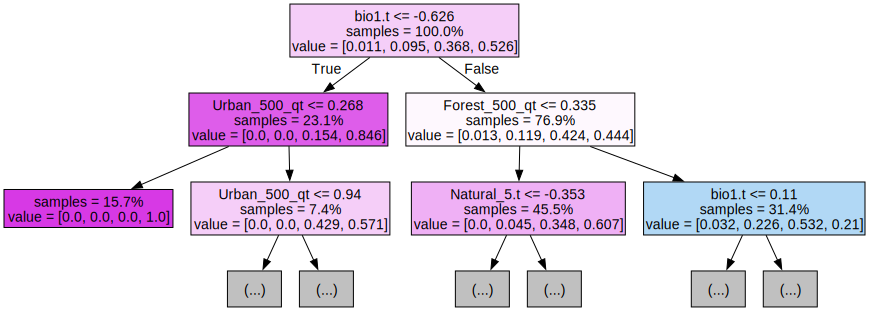

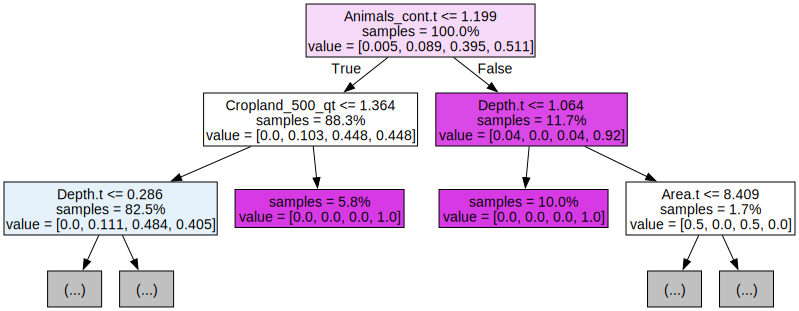

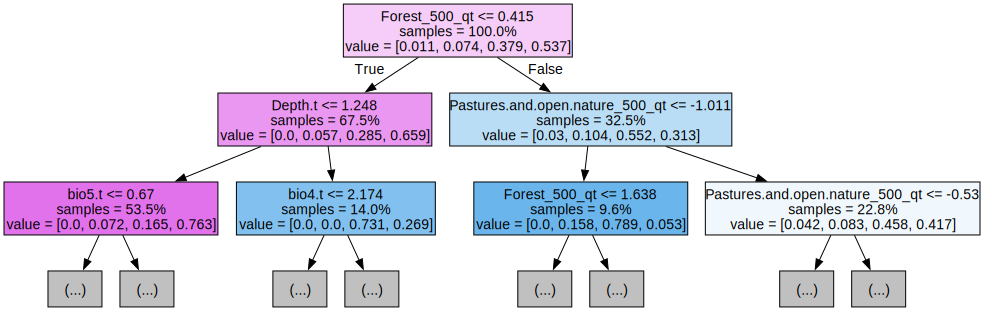

In [43]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [44]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

/Users/lidiayung/miniforge3/envs/cstar/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x12ed41fd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x12ed2fc50>})

In [45]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 18, 'n_estimators': 143}


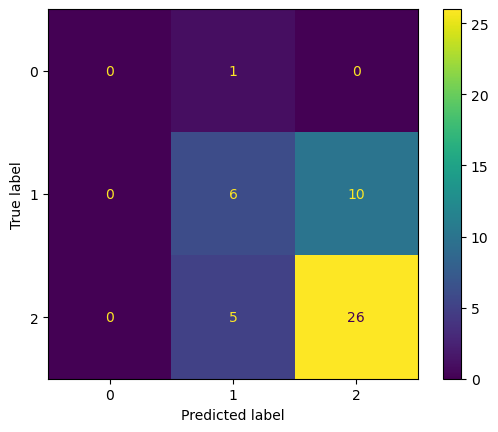

In [46]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

<Axes: >

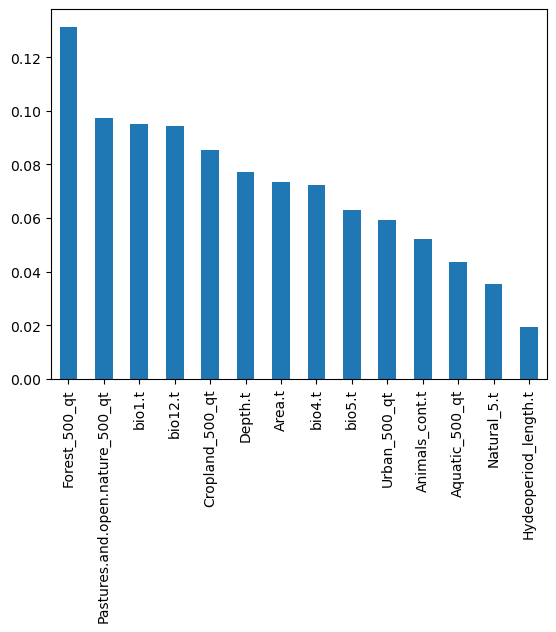

In [47]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar()